# ***Connect to Drive***


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Python Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

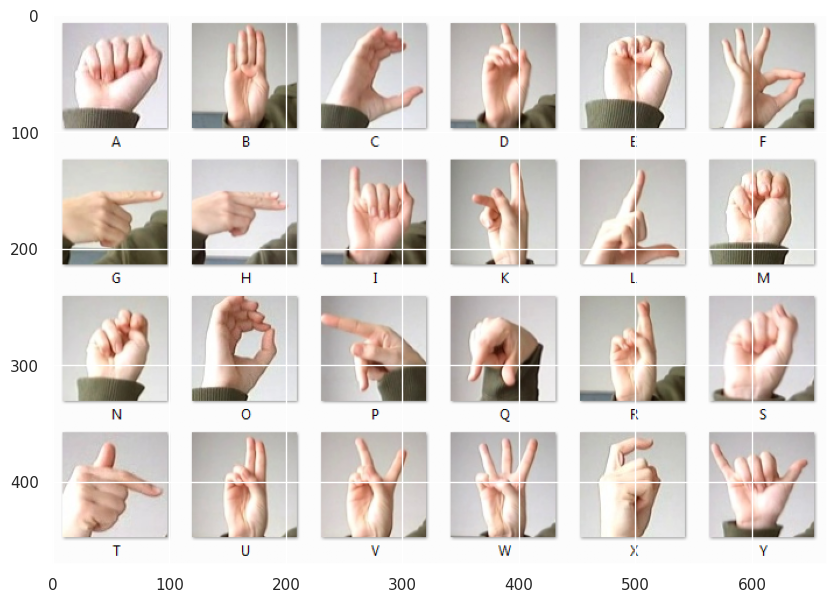

In [4]:
plt.figure(figsize = (10,10))
img = plt.imread('/content/drive/MyDrive/amer_sign2.png')
plt.imshow(img)
plt.show()

# **Load Data**

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
df_train.shape

(27455, 785)

In [8]:
df_test = pd.read_csv('/content/drive/MyDrive/sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [9]:
df_test.shape

(7172, 785)

# **Data INFO**

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


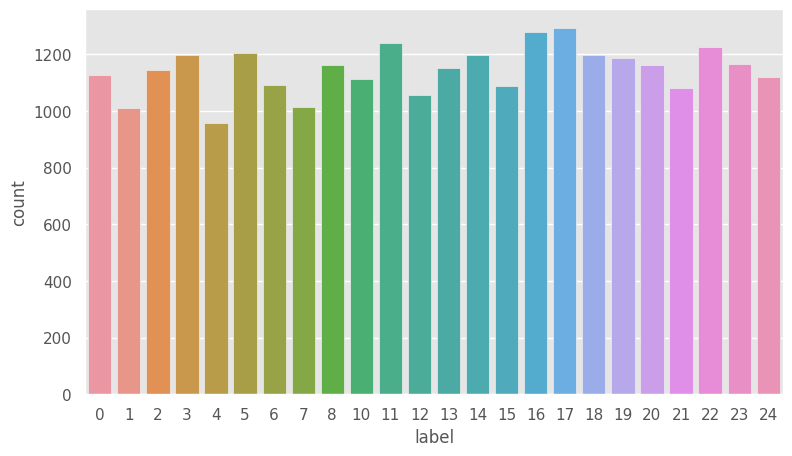

In [12]:
plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x= df_train['label'],data = df_train)
plt.show()

In [13]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace=True)
df_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [14]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [15]:
size  = 28
channels = 1
batch = 128
epochs = 100

X_train = df_train.values.reshape(df_train.shape[0], size, size, channels)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


# **Data augmentation and Normalization**

In [16]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenRescale = ImageDataGenerator(rescale=1./255)

X_train = datagen.flow(X_train, y_train, batch_size=batch)

X_test = datagenRescale.flow(X_test, y_test)

# **Models Performance**

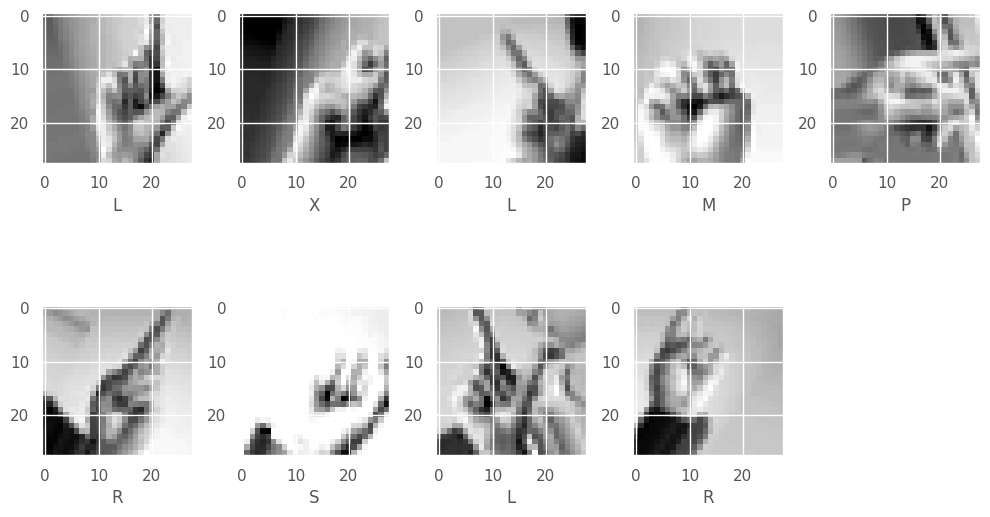

In [22]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in X_train:
        image = X_batch[i]
        plt.imshow(image, cmap='gray')
        plt.xlabel(alphabet[Y_batch[i]])
        break
plt.tight_layout()
plt.show()

# **Build DCNN Model**

In [23]:
checkpoint_filepath = 'Sign_Language_Model.h5'

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

In [24]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                 
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                    
                    
                    Flatten(),
                    
                    Dense(units=4096, activation="relu"),                 
                    Dropout(0.2),
                    
                    Dense(units=1024, activation="relu"),
                    Dropout(0.2),
                                  
                    Dense(units=256, activation="relu"),
                    Dropout(0.2),
                    
                    Dense(units=25, activation="softmax"),
])


Model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 128)        

# **Train Model**

In [25]:
history = Model.fit(X_train, validation_data=X_test, epochs=epochs, callbacks=callbacks)

Epoch 1/100
215/215 [==============================] - 21s 86ms/step - loss: 3.1049 - accuracy: 0.0639 - val_loss: 2.8670 - val_accuracy: 0.0958 - lr: 0.0010
Epoch 2/100
215/215 [==============================] - 17s 81ms/step - loss: 2.5188 - accuracy: 0.1842 - val_loss: 1.8373 - val_accuracy: 0.3394 - lr: 0.0010
Epoch 3/100
215/215 [==============================] - 18s 84ms/step - loss: 1.7384 - accuracy: 0.3939 - val_loss: 1.1439 - val_accuracy: 0.5414 - lr: 0.0010
Epoch 4/100
215/215 [==============================] - 18s 83ms/step - loss: 1.2559 - accuracy: 0.5615 - val_loss: 0.7029 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 5/100
215/215 [==============================] - 17s 81ms/step - loss: 0.9984 - accuracy: 0.6516 - val_loss: 0.5408 - val_accuracy: 0.8302 - lr: 0.0010
Epoch 6/100
215/215 [==============================] - 18s 81ms/step - loss: 0.8336 - accuracy: 0.7066 - val_loss: 0.3948 - val_accuracy: 0.8434 - lr: 0.0010
Epoch 7/100
215/215 [==============================]

# **Train Curves**

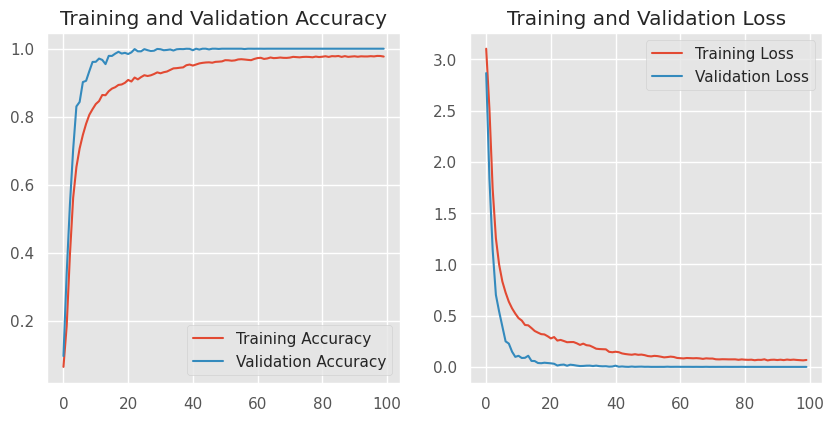

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Test Model**

In [28]:
df_test = pd.read_csv('/content/drive/MyDrive/sign_mnist_test.csv')
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

In [33]:
y_pred = np.argmax(Model.predict(X_test),axis = 1) 

225/225 [==============================] - 1s 2ms/step


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       331
           1       1.00      1.00      1.00       432
           2       1.00      0.91      0.95       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       0.96      1.00      0.98       247
           6       0.89      0.96      0.92       348
           7       0.98      0.90      0.94       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       1.00      0.98      0.99       291
          14       0.89      1.00      0.94       246
          15       1.00      1.00      1.00       347
          16       0.98      1.00      0.99       164
          17       1.00      0.99      0.99       144
          18       0.99    

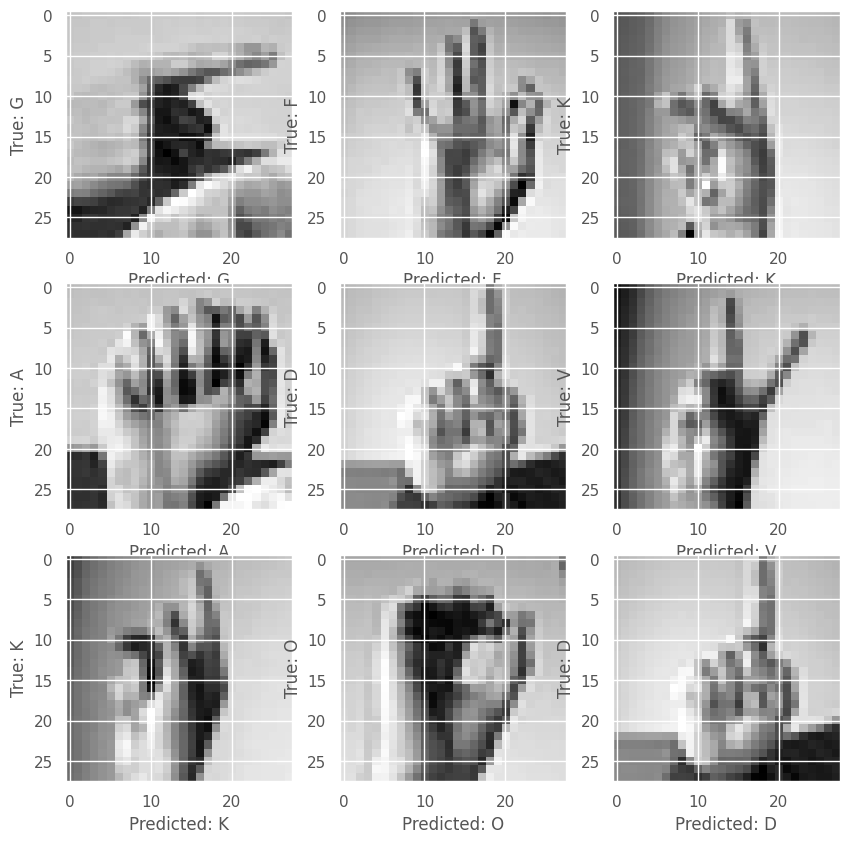

In [35]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")
    
plt.show()